Example from "Numerical solution of the (stochastic) wave equation"


from JOHN B. WALSH, see: https://www.math.ubc.ca/~walsh/waveq.pdf


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sde.spde_utils import SPDEUtils

### Define stochastic wave equation:

$$
\frac{\partial^2 u}{\partial t^2}=\frac{\partial^2 u}{\partial x^2}+f(x,t,u)+g(x,t,u)\dot{W},\ x\in\mathbb{R}, t\in\mathbb{R}^+,
$$

$$
u(x,0)=u_0(x),\ \frac{\partial u}{\partial t}(x,0)=v_0(x),\ x\in\mathbb{R}.
$$

Here, $f$ is the deterministic and $g$ the stochastic forcing term.

In [2]:
# Define example parameters
step_size = 1e-3
space_size = 1
time_size = 2
space = np.arange(int(space_size/step_size))*step_size
time = np.arange(int(time_size/step_size))*step_size

# no forcing
f = lambda x, t, u: 0 * x
g = lambda x, t, u: 0 * x

u0 = np.zeros((len(space),)) + np.sin(2*np.pi*space) * 0 + np.exp(-(space-space_size/4*3)**2 * 150)/2
v0 = np.zeros((len(space),))
v0 = -np.gradient(u0, step_size)*2


def plot_example(*args, **kwargs):
    fig, ax = plt.subplots(1, 2, figsize=(10, 3))
    divider = make_axes_locatable(ax[0])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    ut = SPDEUtils.integrate_stochastic_wave(*args, **kwargs)

    im1 = ax[0].imshow(ut, extent=[np.min(space), np.max(space), np.min(time), np.max(time)], origin='lower')#, vmin=-1, vmax=1)
    ax[0].set_xlabel('Space')
    ax[0].set_ylabel('Time')
    fig.colorbar(im1, cax=cax, orientation='vertical')

    ax[1].plot(ut[0:(len(time)//5):(len(time)//5//5), :].T)
    ax[1].set_xlim([0, 500])
    fig.tight_layout()

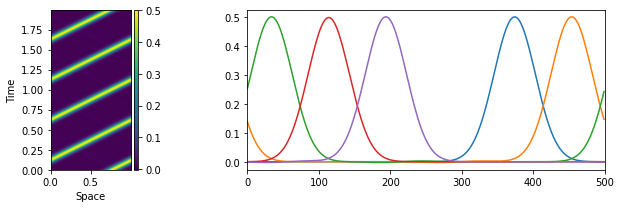

In [3]:
# Test on simple example with periodic boundaries
plot_example(u0, v0, f, g, time, space, random_seed=1, periodic_boundary=True)

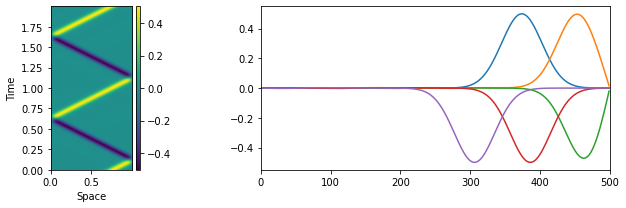

In [4]:
# Test on simple example with zero boundaries (reflecting)
plot_example(u0, v0, f, g, time, space, random_seed=1, periodic_boundary=False)

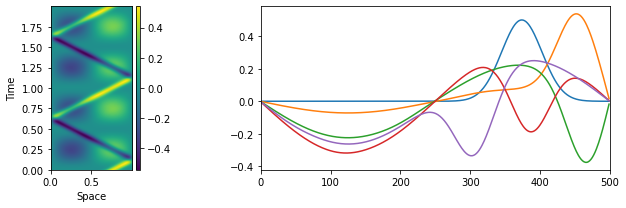

In [5]:
# Test on simple example with zero boundaries and deterministic forcing in space
f2 = lambda x, t, u: -np.sin(x*2*np.pi) * 25
plot_example(u0, v0, f2, g, time, space, random_seed=1, periodic_boundary=False)

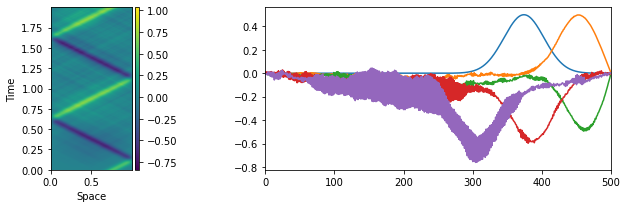

In [6]:
# Test on simple example with zero boundaries and stochastic forcing in the center
g2 = lambda x, t, u: np.exp(-(x-space_size/2)**2 * 20) * 1
plot_example(u0, v0, f, g2, time, space, random_seed=1, periodic_boundary=False)

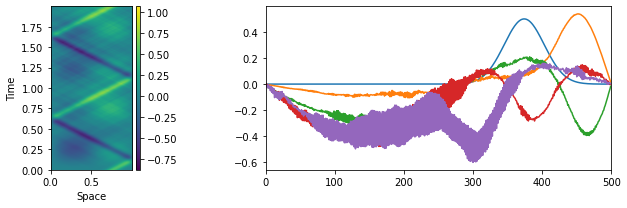

In [7]:
# Test on simple example with zero boundaries and combined deterministic and stochastic forcing
plot_example(u0, v0, f2, g2, time, space, random_seed=1, periodic_boundary=False)

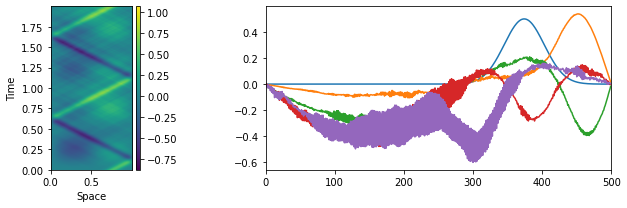

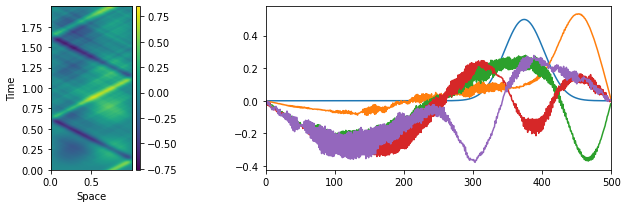

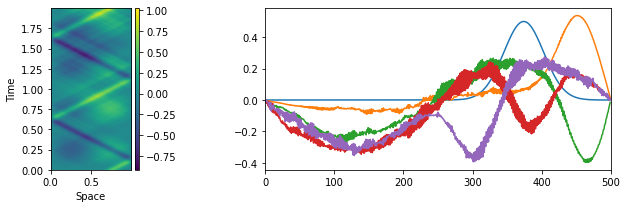

In [8]:
# now with different random seeds
for k in range(3):
    plot_example(u0, v0, f2, g2, time, space, random_seed=k+1, periodic_boundary=False)

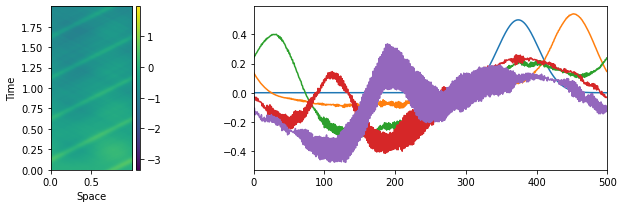

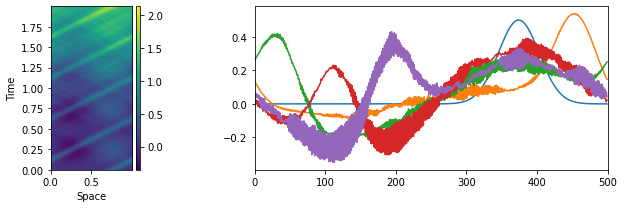

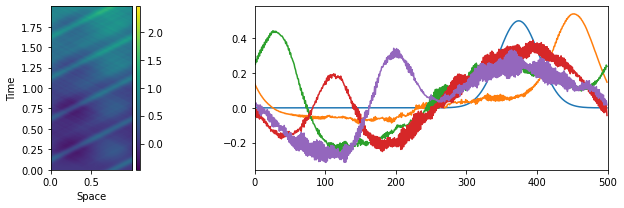

In [9]:
# now with different random seeds, but periodic boundaries
for k in range(3):
    plot_example(u0, v0, f2, g2, time, space, random_seed=k+1, periodic_boundary=True)